# 1. Import necessary packages

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from scipy.stats import skew, norm
%matplotlib inline
from numpy.random import seed


# 2. Load Data

In [10]:
# Uploading data files 


bcpred = pd.read_csv('Breast_cancer_data.csv')
bcpred.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.990,10.380,122.800,1001.000,0.118,0
1,20.570,17.770,132.900,1326.000,0.085,0
2,19.690,21.250,130.000,1203.000,0.110,0
3,11.420,20.380,77.580,386.100,0.142,0
4,20.290,14.340,135.100,1297.000,0.100,0


# 3. Data Definition 

In [11]:
bcpred.shape

(569, 6)

In [12]:
# Check column names
bcpred.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [13]:
# Data types
bcpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [14]:
# Summary Stats
bcpred.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.627
std,3.524,4.301,24.299,351.914,0.014,0.484
min,6.981,9.710,43.790,143.500,0.053,0.000
25%,11.700,16.170,75.170,420.300,0.086,0.000
50%,13.370,18.840,86.240,551.100,0.096,1.000
75%,15.780,21.800,104.100,782.700,0.105,1.000
max,28.110,39.280,188.500,2501.000,0.163,1.000


# 4. Duplication & Missing Values Check

In [15]:
# Checking for null values
bcpred.isnull().values.any()

False

In [16]:
# Checking for not null values
bcpred.notnull()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
564,True,True,True,True,True,True
565,True,True,True,True,True,True
566,True,True,True,True,True,True
567,True,True,True,True,True,True


In [17]:
# Duplicates check
idsUnique = len(set(bcpred))
idsTotal = bcpred.shape[0]
idsDupli = idsTotal - idsUnique

print('There are ' + str(idsDupli) + ' duplicate IDS for ' + ' total entries')


There are 563 duplicate IDS for  total entries


In [18]:
#Deleting duplicates
bcpred.drop_duplicates()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.990,10.380,122.800,1001.000,0.118,0
1,20.570,17.770,132.900,1326.000,0.085,0
2,19.690,21.250,130.000,1203.000,0.110,0
3,11.420,20.380,77.580,386.100,0.142,0
4,20.290,14.340,135.100,1297.000,0.100,0
...,...,...,...,...,...,...
564,21.560,22.390,142.000,1479.000,0.111,0
565,20.130,28.250,131.200,1261.000,0.098,0
566,16.600,28.080,108.300,858.100,0.085,0
567,20.600,29.330,140.100,1265.000,0.118,0


In [19]:
# Checking for missing values
bcpred.isnull()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
564,False,False,False,False,False,False
565,False,False,False,False,False,False
566,False,False,False,False,False,False
567,False,False,False,False,False,False


# 5. EDA - MeanRadius vs. MeanArea

In [20]:
bcpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [21]:
bcpred.mean_radius.describe()

count   569.000
mean     14.127
std       3.524
min       6.981
25%      11.700
50%      13.370
75%      15.780
max      28.110
Name: mean_radius, dtype: float64

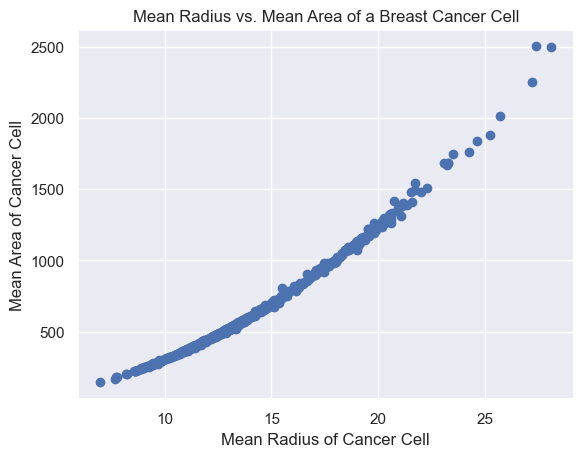

In [22]:
#Comparing the Mean Radius vs. Mean Area to see if there is a correlation in determining whether one has breast cancer or not

plt.scatter(bcpred['mean_radius'], bcpred['mean_area'])
plt.xlabel('Mean Radius of Cancer Cell')
plt.ylabel('Mean Area of Cancer Cell')
plt.title('Mean Radius vs. Mean Area of a Breast Cancer Cell')
plt.show()

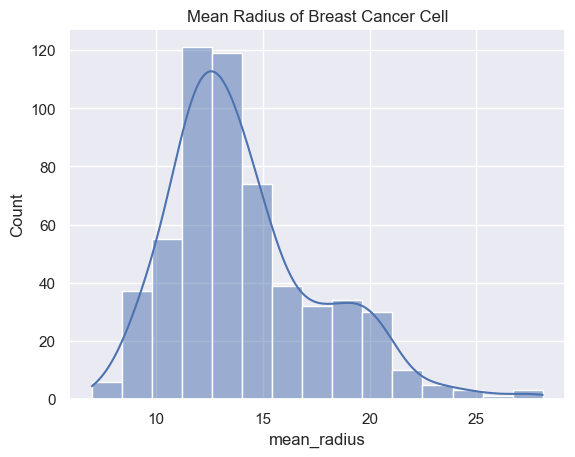

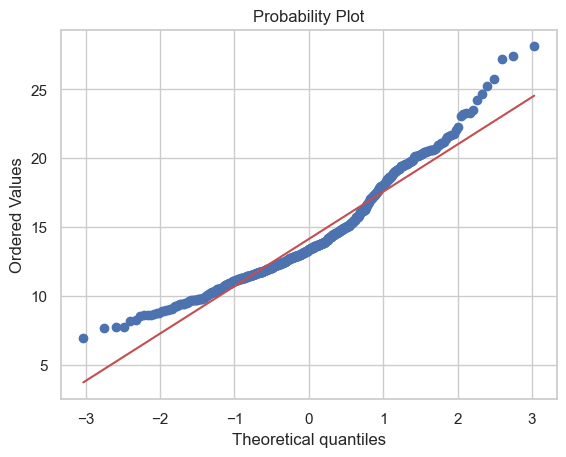

In [23]:
#Making a histogram plot of mean_radius

fig, ax = plt.subplots()
sns.histplot(bcpred['mean_radius'], kde=True, bins=15)
sns.set_style('whitegrid')
ax.set(title='Mean Radius of Breast Cancer Cell')
plt.show()

# QQ-plot
fig = plt.figure()
res = stats.probplot(bcpred['mean_radius'], plot=plt)
plt.show()

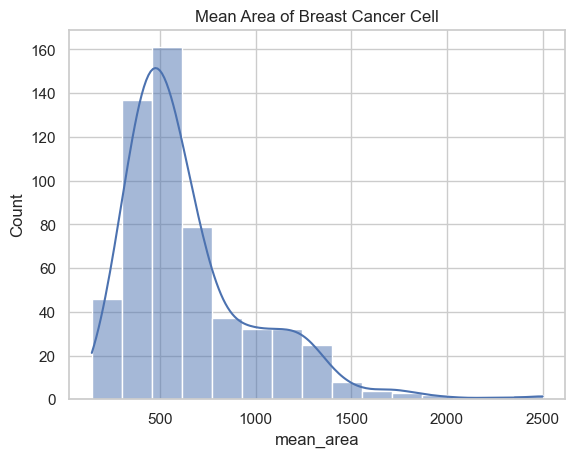

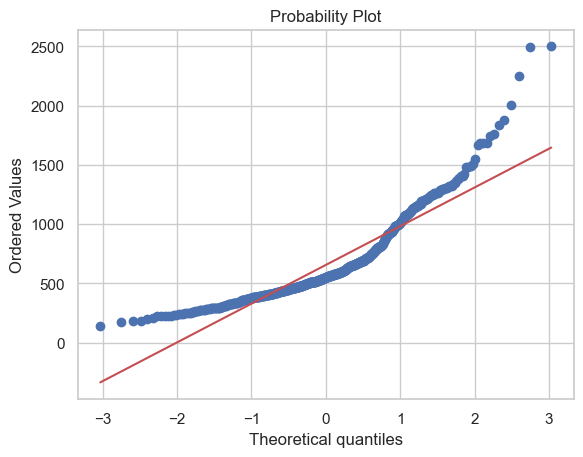

In [24]:
#Making a histogram plot of mean_area

fig, ax = plt.subplots()
sns.histplot(bcpred['mean_area'], kde=True, bins=15)
sns.set_style('whitegrid')
ax.set(title='Mean Area of Breast Cancer Cell')
plt.show()

# QQ-plot
fig = plt.figure()
res = stats.probplot(bcpred['mean_area'], plot=plt)
plt.show()

# 5. Important Numeric Predictions

5.1 Correlations with MeanRadius and MeanArea

In [25]:
num_features = [col for col in bcpred.select_dtypes(exclude = ['object']).columns]

print("There are ", len(num_features), " numeric variables")

There are  6  numeric variables


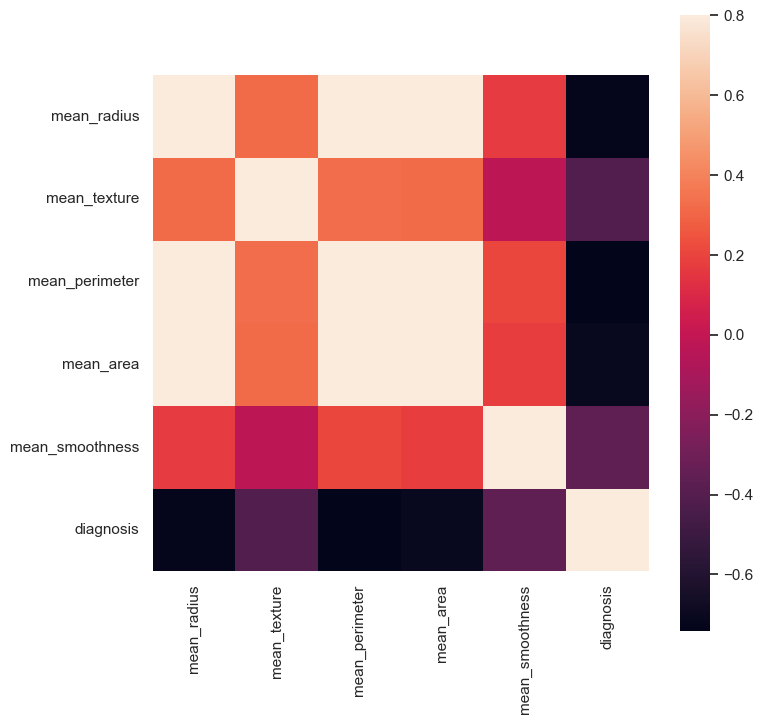

In [26]:
# gaining a view of relationships among the features
corrmat = bcpred.corr()
f, ax = plt.subplots(figsize= (8, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

Looking at the above heatmap, one can see taht there is a strong correlation between mean_radius, and mean_area, and mean_perimeter, which indicates multicollinearity. 

Even with these strong correlations, the others have to be taking into account such as: mean_smoothness and diagnosis. 

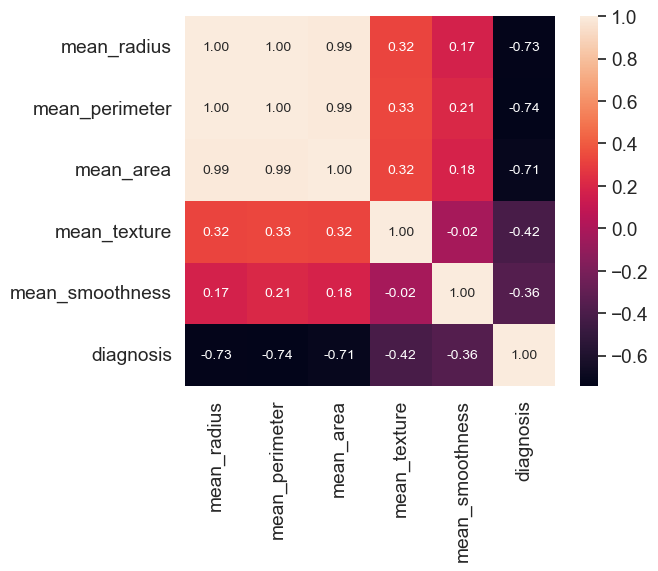

In [27]:
#correlation matrix for mean_radius
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'mean_radius')['mean_radius'].index
cm = np.corrcoef(bcpred[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

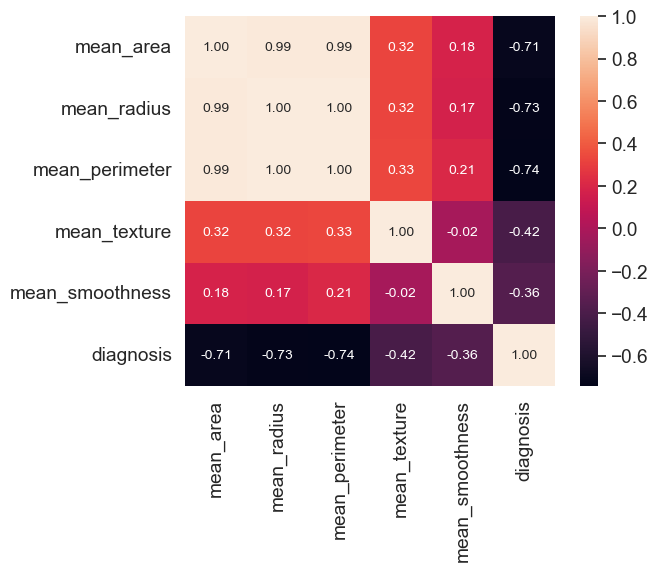

In [28]:
#correlation matrix for mean_area
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'mean_area')['mean_area'].index
cm = np.corrcoef(bcpred[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

~Looking at both heatmaps for mean_radius and mean_area, there are 6 numerical values of at leat -0.7, which indicates a positive correlation. 


# 5.2 Overall Quality

<AxesSubplot:xlabel='mean_radius', ylabel='mean_area'>

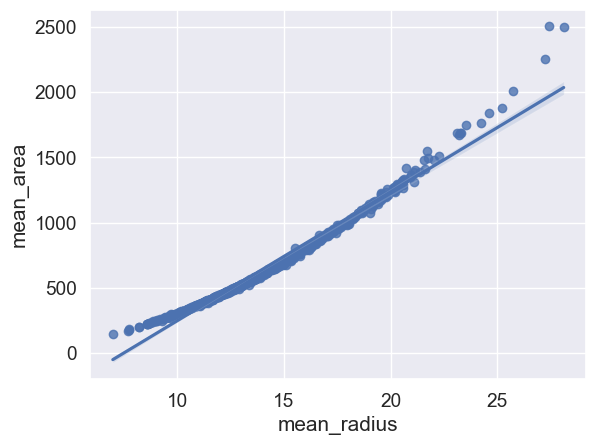

In [29]:
sns.regplot(x=bcpred['mean_radius'], y=bcpred['mean_area'], data=bcpred)


There are no outliers, that stand out, that idicated something different. The 3 outliers on the top-right are of relation to the other data points. 

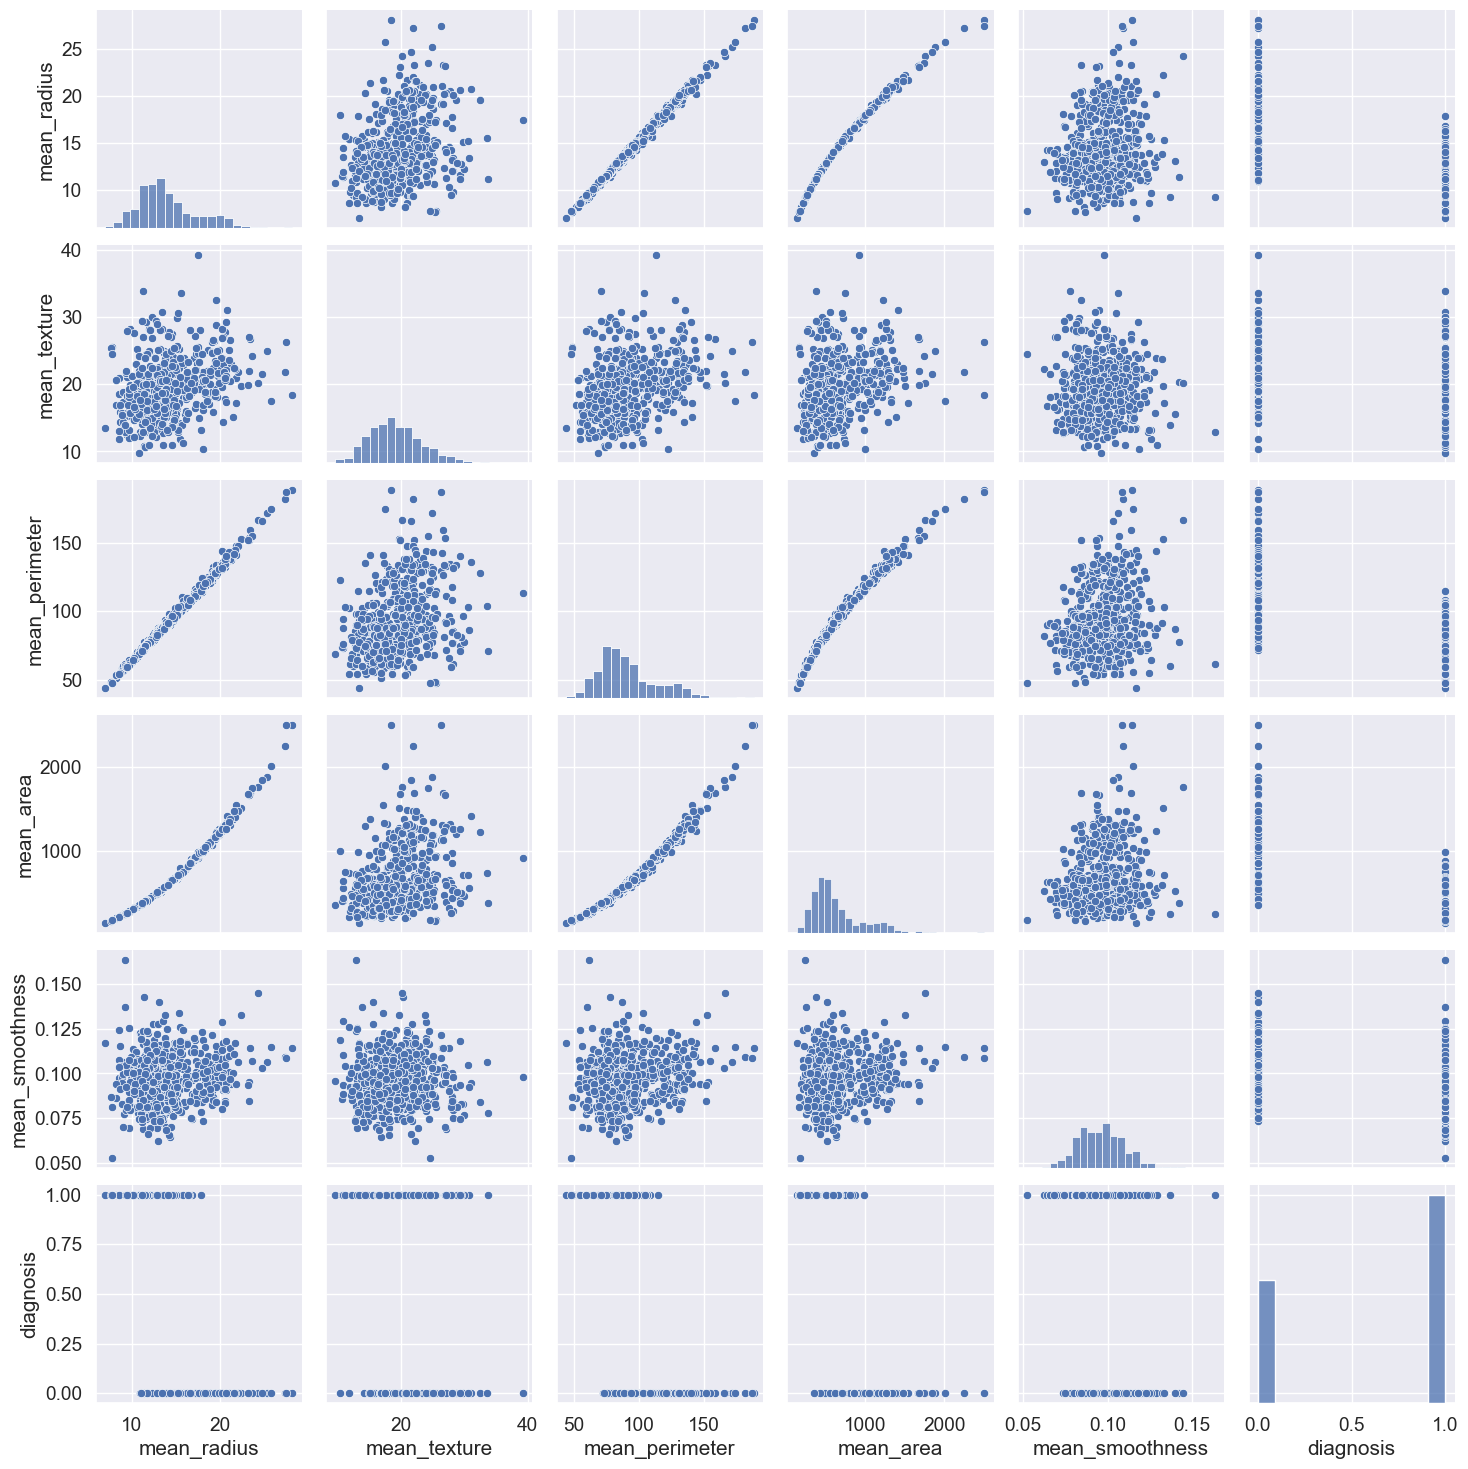

In [30]:
#Pair plot for all numerical variables
sns.pairplot(bcpred, palette='Set1')
plt.show()

# Import pacakges

In [31]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
import scipy.stats as stats
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from scipy.stats import skew
from scipy.stats import f_oneway

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#njobs = 4

In [32]:
sns.set()

# Importance of Categorical/numerical features vs target variable

In [35]:
# Separate the feature and target variable
target = bcpred['mean_radius'], bcpred['mean_area']

anova_results = {}

for feature in bcpred.select_dtypes(include=['object']):
    # Perform ANOVA test for the current feature
    f_statistic, p_value = f_oneway(*(target[df_cleaned[feature] == category] for category in df_cleaned[feature].unique()))
    # Store the ANOVA results for the current feature in the dictionary
    anova_results[feature] = {'f_statistic': f_statistic, 'p_value': p_value}

# Sort the ANOVA results by the F-statistic in descending order
sorted_results = sorted(anova_results.items(), key=lambda x: x[1]['f_statistic'], reverse=True)

# Print the sorted ANOVA results
for feature, results in sorted_results:
    print('{}: F-statistic: {:.2f}, p-value: {:.2f}'.format(feature, results['f_statistic'], results['p_value']))

In [39]:
# Select the numeric features and the target variable
num_features = bcpred.select_dtypes(exclude=['object']).columns
target_var = 'mean_area' 

# Calculate the Pearson correlation coefficient between each numeric feature and the target variable
corr_results = {}
for feature in num_features:
    corr_coef = bcpred[feature].corr(bcpred[target_var])
    corr_results[feature] = corr_coef

# Create a DataFrame to store the results
result_df = pd.DataFrame.from_dict(corr_results, orient='index', columns=['Correlation Coefficient'])

# Sort the DataFrame by correlation coefficient in descending order
result_df = result_df.sort_values(by='Correlation Coefficient', ascending=False)

# Print the resulting DataFrame
print(result_df)

                 Correlation Coefficient
mean_area                          1.000
mean_radius                        0.987
mean_perimeter                     0.987
mean_texture                       0.321
mean_smoothness                    0.177
diagnosis                         -0.709


In [41]:
train = bcpred

In [42]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["mean_radius"], ascending = False, inplace = True)
print(corr.mean_radius)

Find most important features relative to target
mean_radius        1.000
mean_perimeter     0.998
mean_area          0.987
mean_texture       0.324
mean_smoothness    0.171
diagnosis         -0.730
Name: mean_radius, dtype: float64


# differentiating numerical and categorical features

In [44]:
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("mean_radius")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 5
Categorical features : 0


# Log transform of skewed numerical features to lessen outliers impact

In [45]:
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])

4 skewed numerical features to log transform


/var/folders/nm/_c2wjrrx17l5nmt2wn32fqc00000gn/T/ipykernel_78725/3352021519.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num[skewed_features] = np.log1p(train_num[skewed_features])


In [47]:
train_num.head()

,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,2.432,4.819,6.910,0.118,0.000
1,2.932,4.897,7.191,0.085,0.000
2,3.102,4.875,7.093,0.110,0.000
3,3.062,4.364,5.959,0.142,0.000
4,2.730,4.913,7.169,0.100,0.000


# Transforming numerical features (no available categorial features)

In [49]:
# Create dummy features for categorical values via one-hot encoding
train_num = pd.get_dummies(train_num)

train_num.head()

,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,2.432,4.819,6.910,0.118,0.000
1,2.932,4.897,7.191,0.085,0.000
2,3.102,4.875,7.093,0.110,0.000
3,3.062,4.364,5.959,0.142,0.000
4,2.730,4.913,7.169,0.100,0.000


# Data split into testing and training sets

In [51]:
# Join categorical and numerical features
X = pd.concat([train_num, train_cat], axis = 1)
y= train.mean_radius
print("New number of features : " + str(bcpred.shape[1]))

# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

New number of features : 6
X_train : (398, 5)
X_test : (171, 5)
y_train : (398,)
y_test : (171,)


# Standardize magniture of numeric features via scaler

In [52]:
# Standardize numerical features
stdSc = StandardScaler()
X_train.loc[:, numerical_features] = stdSc.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])